In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [2]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [3]:
counts = {}
for i in np.unique(y):
    counts[i] = X[y == i].sum(axis=0)
counts

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [6]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('training set score: ', tree.score(X_train, y_train))
print('testing set score: ', tree.score(X_test, y_test))

training set score:  1.0
testing set score:  0.9370629370629371


In [63]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('training set score: ', tree.score(X_train, y_train))
print('testing set score: ', tree.score(X_test, y_test))

training set score:  0.9882629107981221
testing set score:  0.951048951048951


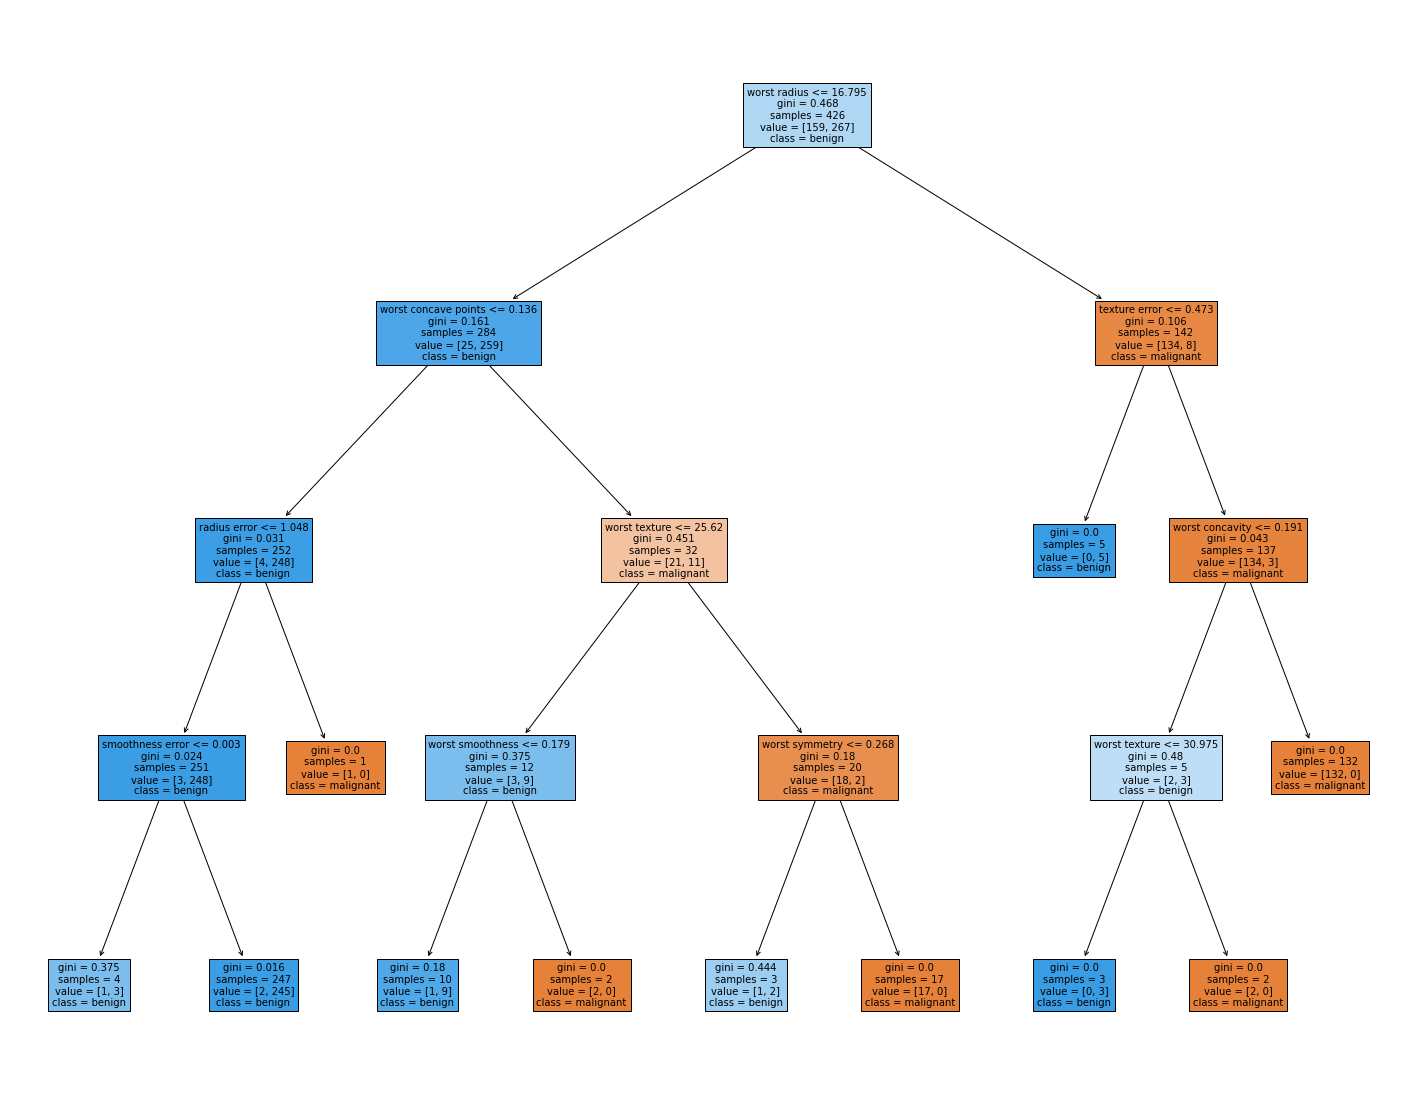

In [64]:
plt.figure(figsize=(25, 20))
_ = plot_tree(tree,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              filled=True)

In [65]:
sorted(zip(cancer.feature_names, tree.feature_importances_), key=lambda x: x[1], reverse=True)

[('worst radius', 0.7268285094603201),
 ('worst concave points', 0.12211319926548449),
 ('texture error', 0.0483982536186494),
 ('worst texture', 0.045815897088866304),
 ('worst concavity', 0.0181879968644502),
 ('worst smoothness', 0.014157702104714051),
 ('worst symmetry', 0.01188547831013032),
 ('radius error', 0.010197368202069328),
 ('smoothness error', 0.002415595085315826),
 ('mean radius', 0.0),
 ('mean texture', 0.0),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0),
 ('compactness error', 0.0),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst perimeter', 0.0),
 ('worst area', 0.0),
 ('worst compactness', 0.0),
 ('worst fractal dimension', 0.0)]

In [66]:
def plot_feature_importances(model):
    plt.figure(figsize=(10, 10))
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature name')
    plt.ylim(-1, n_feature)

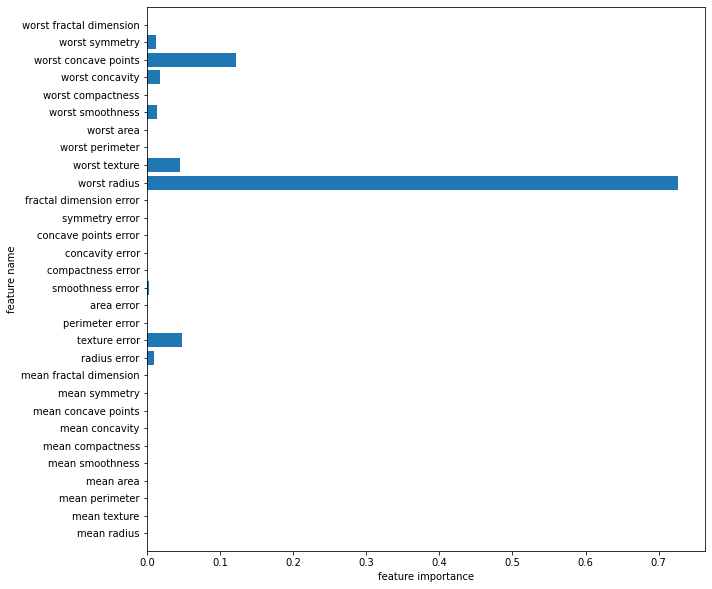

In [67]:
plot_feature_importances(tree)

Feature importances: [0. 1.]


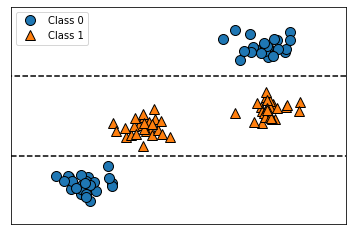

In [68]:
tree = mglearn.plots.plot_tree_not_monotone()

In [70]:
import pandas as pd
import os

In [72]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

Text(0, 0.5, 'Price in $/Mbyte')

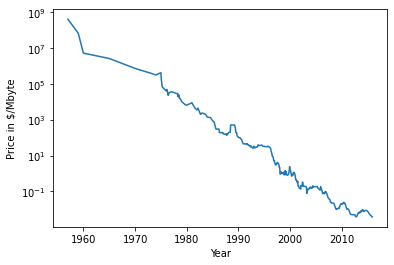

In [76]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

<ipython-input-88-ed95888035c8>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis]


In [89]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

In [90]:
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = lr.predict(X_all)

<ipython-input-90-60784db522d4>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


In [92]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

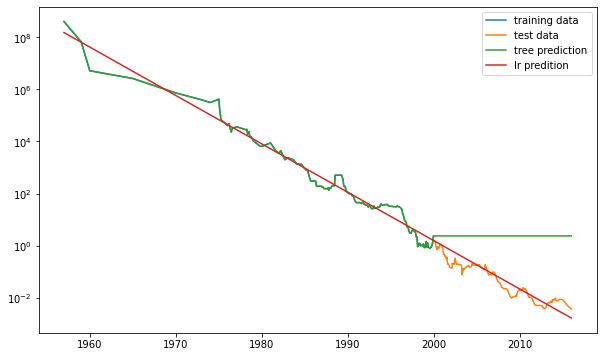

In [95]:
plt.figure(figsize=(10, 6))
plt.semilogy(data_train.date, data_train.price, label='training data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='lr predition')
plt.legend()

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=2)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [132]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

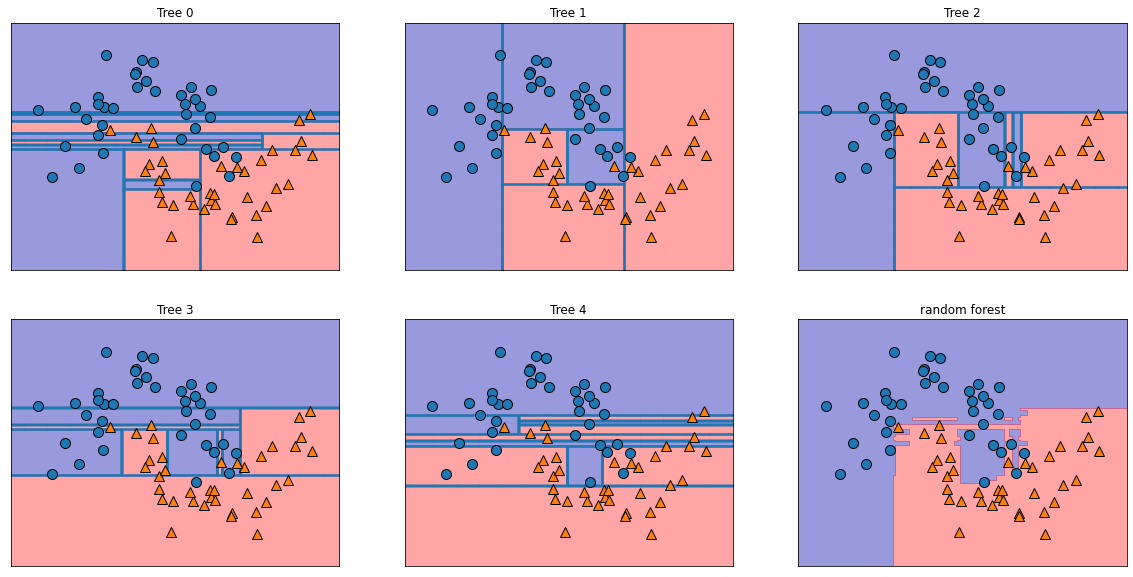

In [133]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("train set score: ", forest.score(X_train, y_train))
print("test set score: ", forest.score(X_test, y_test))

train set score:  1.0
test set score:  0.972027972027972


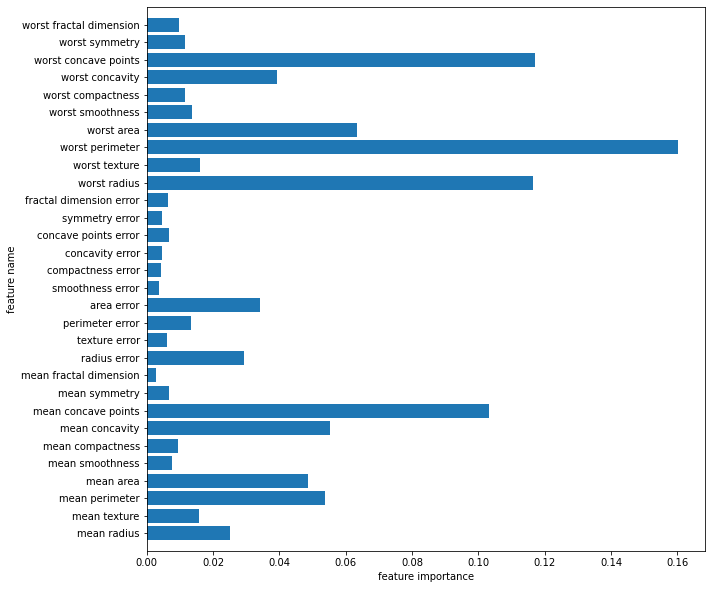

In [146]:
plot_feature_importances(forest)

Text(0, 0.5, 'feature importance value')

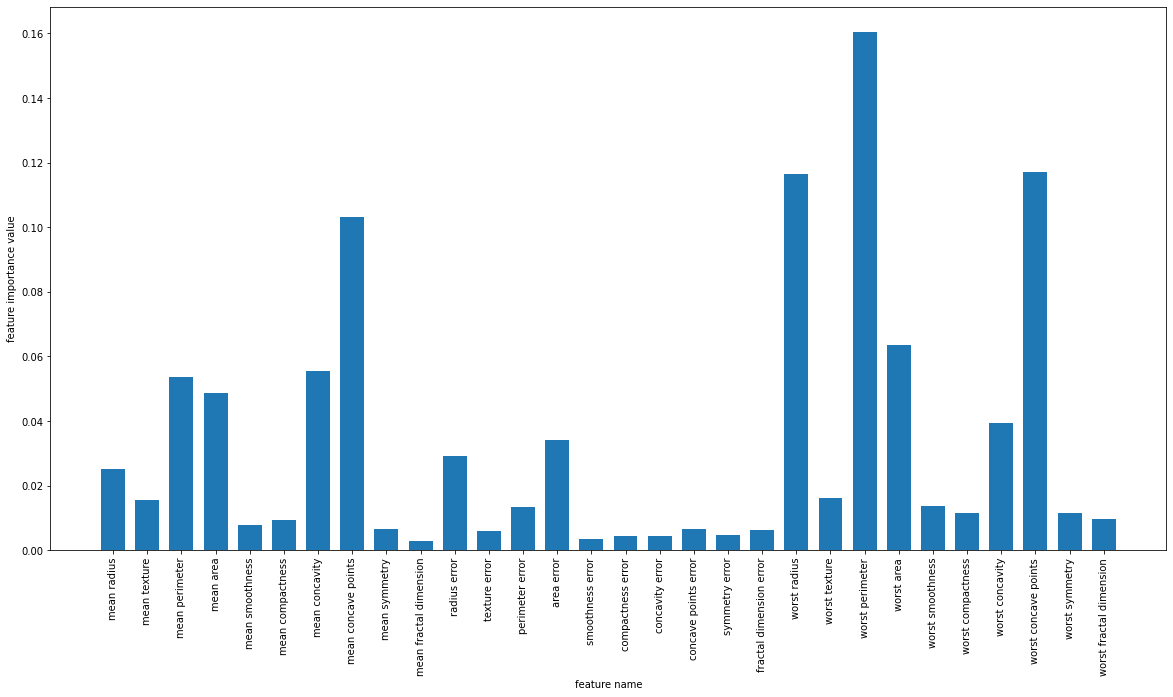

In [166]:
plt.figure(figsize=(20, 10))
plt.bar(cancer.feature_names, forest.feature_importances_, width=.7)
plt.xticks(rotation=90)
plt.xlabel('feature name')
plt.ylabel('feature importance value')

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(n_estimators=1000, max_depth=1, learning_rate=0.6)
gbrt.fit(X_train, y_train)

print('accuracy on train set: ', gbrt.score(X_train, y_train))
print('accuracy on test set: ', gbrt.score(X_test, y_test))

accuracy on train set:  1.0
accuracy on test set:  0.972027972027972
